# This notebook will be used to create all the graphs for the report

In [1]:
# imports
import pandas as pd
from river_class import river_obj
from undershot_calcs import underTurbine
from breastshot_calcs import breastTurbine
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import test data
data_df = pd.read_csv('Test Data/testData.csv')

# concatenate testDataMore.csv to testData.csv
data_df = pd.concat([data_df, pd.read_csv('Test Data/testDataMore.csv')])

# remove nan values
data_df = data_df.dropna()



data_df


,Position,x centre [m],y centre [m],Output power [kW],Period for 10 rotation [s],Period for 1 rotation [s],Turbine rotational speed [rev/s],Turbine rotational speed [RPM],Generator rotational speed [RPM]
0,A,0.65,0.14,0.366,41.52,4.152,0.241,14.5,231.2
1,B,0.65,0.02,0.391,40.62,4.062,0.246,14.8,236.3
2,C,0.73,0.04,0.393,40.37,4.037,0.248,14.9,237.8
3,D,0.73,0.12,0.299,41.89,4.189,0.239,14.3,229.2
4,E,0.69,-0.10,0.471,38.46,3.846,0.260,15.6,249.6
5,F,0.88,-0.13,0.505,37.15,3.715,0.269,16.2,258.4
6,G,0.98,-0.45,0.638,34.54,3.454,0.290,17.4,277.9
7,H,1.12,-0.50,0.768,28.60,2.860,0.350,21.0,335.7
8,I,1.24,-0.54,0.772,28.71,2.871,0.348,20.9,334.4
9,J,0.89,-0.18,0.548,35.97,3.597,0.278,16.7,266.9


In [3]:
'''
To validate the data i will first run the horizontal, 
vertical offset and turbine rot speed as inputs and compare for error on output power

Water height in channel = 0.3m
Channel width = 0.77m
Approx. 1.5 m/s

turbine dims:
radius = 0.585m
width = 1.008m
number of blades = 6

'''

# create river object
r_width = 0.77
r_depth = 0.3
r_velocity = 1.5

river = river_obj(r_width, r_depth, r_velocity, head=0.5)

# create a breastshot turbine object - with values from data sheet
breast_turbine = breastTurbine(river)




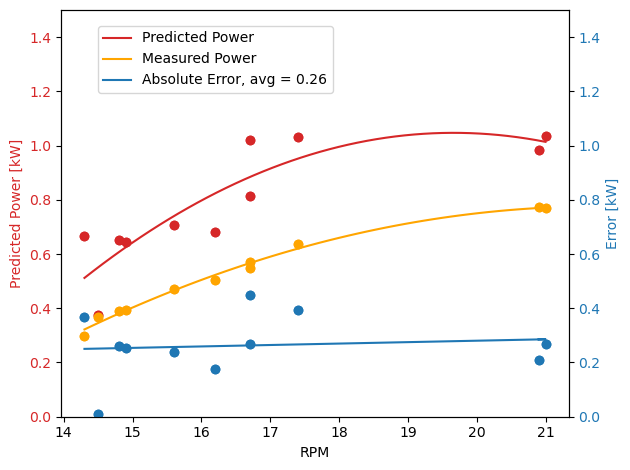

In [4]:
# plot power vs RPM on one axis and error vs RPM on the other axis



# order the data by RPM
data_df = data_df.sort_values(by=['Output power [kW]'])

# create a list of power outputs
power_list = []
error_list = []

# iterate through the data and calculate the power output
for index, row in data_df.iterrows():

    # get the turbine rotational speed
    turbine_rot_speed = row['Turbine rotational speed [RPM]']

    # get the turbine horizontal offset
    turbine_horiz_offset = row['x centre [m]']

    # get the turbine vertical offset
    turbine_vert_offset = row['y centre [m]']

    # re initialise the breastshot turbine object
    breast_turbine.__init__(river, RPM=turbine_rot_speed, x_centre=turbine_horiz_offset, y_centre=turbine_vert_offset)

    # calculate the power output
    power = breast_turbine.analysis()/1000

    # calculate the error
    error = abs(power - row['Output power [kW]']) 

    # add the power and error to the lists
    power_list.append(power)
    error_list.append(error)    

# plot power vs RPM on one axis and error vs RPM on the other axis
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('RPM')
ax1.set_ylabel('Predicted Power [kW]', color=color)
ax1.plot(data_df['Turbine rotational speed [RPM]'], power_list,'o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(data_df['Turbine rotational speed [RPM]'], data_df['Output power [kW]'], 'o',color='orange')

# plot line of best fit for prediction and actual
z = np.polyfit(data_df['Turbine rotational speed [RPM]'], power_list, 2)
# plot the line of best fit on more points
x_new = np.linspace(data_df['Turbine rotational speed [RPM]'].min(), data_df['Turbine rotational speed [RPM]'].max(), 50)
y_new = np.polyval(z, x_new)
ax1.plot(x_new, y_new, color=color, label='Predicted Power')


z = np.polyfit(data_df['Turbine rotational speed [RPM]'], data_df['Output power [kW]'], 2)
# plot the line of best fit on more points
x_new = np.linspace(data_df['Turbine rotational speed [RPM]'].min(), data_df['Turbine rotational speed [RPM]'].max(), 50)
y_new = np.polyval(z, x_new)
ax1.plot(x_new, y_new, color='orange', label='Measured Power')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Error [kW]', color=color)  # we already handled the x-label with ax1
ax2.plot(data_df['Turbine rotational speed [RPM]'], error_list,'o' ,color=color)

# plot line of best fit for error
z = np.polyfit(data_df['Turbine rotational speed [RPM]'], error_list, 1)
p = np.poly1d(z)
ax2.plot(data_df['Turbine rotational speed [RPM]'],p(data_df['Turbine rotational speed [RPM]']),color=color, label='Absolute Error, avg = %.2f' % np.mean(error_list))


ax2.tick_params(axis='y', labelcolor=color)

# limit the y axis to 0 to 1.5
ax1.set_ylim(0, 1.5)
ax2.set_ylim(0, 1.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# put legent in bottom right inside plot
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.95))
plt.show()




this shows that the model accurately can reflect the trends seen in the test data for installation locations and RPM pairings.

Now sensitivity analysis can be conducted with the trends represented fairly.

# Sensitivity Analysis

In [5]:
# sensitivity analysis for flow velocity at a constant RPM (assuming sufficient water flow rate)

# initialise an undershot turbine
undershot_turbine = underTurbine(river)

# create a list of power outputs
bpower_list = []
upower_list = []

# create a list of velocities
velocity_list = np.linspace(1, 10, 20)

# iterate through the data and calculate the power output
for velocity in velocity_list:

    # re initialise the river object
    river.__init__(r_width, r_depth, velocity, head=2)

    # re initialise the breastshot turbine object
    breast_turbine.__init__(river, RPM=20)

    # re initialise the undershot turbine object
    undershot_turbine.__init__(river, RPM=20, y_centre=0.2)

    # optimise the turbine position
    bpower = breast_turbine.optimise()/1000

    # optimise the turbine position
    upower = undershot_turbine.analysis()/1000

    # add the power and error to the lists
    bpower_list.append(bpower)
    upower_list.append(upower)



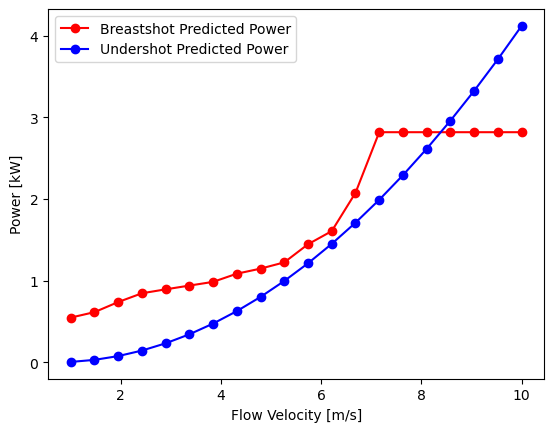

In [6]:
# plot the power vs velocity for breastshot and undershot turbines
plt.plot(velocity_list, bpower_list, 'o-', label='Breastshot Predicted Power', color='red')
plt.plot(velocity_list, upower_list, 'o-', label='Undershot Predicted Power', color='blue')
plt.xlabel('Flow Velocity [m/s]')
plt.ylabel('Power [kW]')
plt.legend()
plt.show()




In [7]:
# position sensitivity analysis for breastshot turbine and undershot turbine
river.__init__(r_width, r_depth, r_velocity, head=2)
# create a list of power outputs
bpower_list = []
upower_list = []

# create a list of velocities
x_pos = np.linspace(0.5, 4.5, 10)
y_pos = np.linspace(-3.5, 1, 10)

# iterate through the data and calculate the power output
for x in x_pos:

    for y in y_pos:
        # re initialise the breastshot turbine object
        breast_turbine.__init__(river, RPM=20, x_centre=x, y_centre=y)

        # optimise the turbine position
        bpower = breast_turbine.analysis()/1000

        # add the power and error to the lists
        bpower_list.append(bpower)

# create the meshgrid
X, Y = np.meshgrid(x_pos, y_pos)





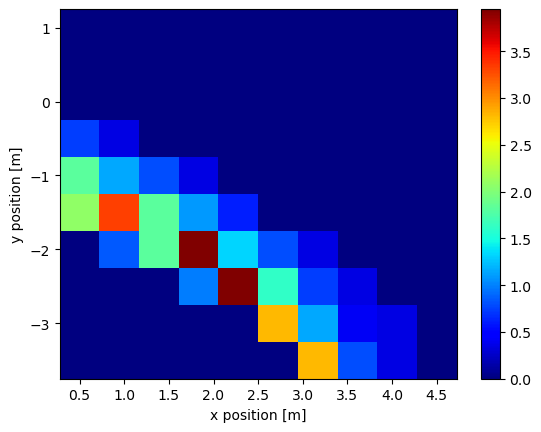

In [8]:
# plot the power vs velocity for breastshot and undershot turbines
plt.pcolormesh(X, Y, np.reshape(bpower_list, (len(y_pos), len(x_pos))), cmap='jet')
plt.colorbar()
plt.xlabel('x position [m]')
plt.ylabel('y position [m]')
plt.show()

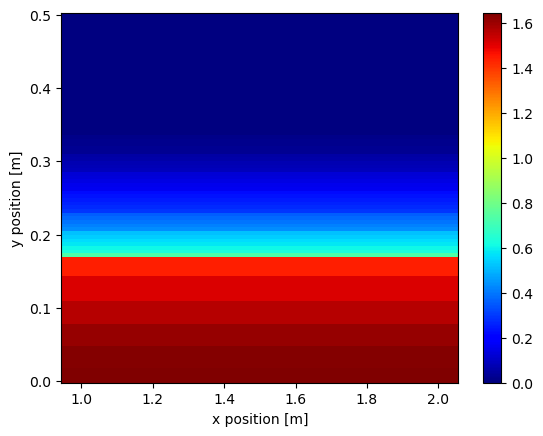

In [9]:
# under shot position sensitivity analysis
# iterate through the data and calculate the power output

river.__init__(10, 3, 4, head=0)
# create a list of power outputs
upower_list = []

# create a list of positions
x_pos = np.linspace(1, 2, 10)
y_pos = np.linspace(0, 0.5, 100)

# the power will be constant for any x position, so only iterate through the y positions
for y in y_pos:
    
    # re initialise the undershot turbine object
    undershot_turbine.__init__(river, RPM=20, y_centre=y)

    # optimise the turbine position
    upower = undershot_turbine.analysis()/1000

    # add the power and error to the lists
    upower_list.append(upower)

# create the meshgrid
X, Y = np.meshgrid(x_pos, y_pos)

# make the upower list a 2d array with constant power for each x position
upower_list = np.reshape(upower_list, (len(y_pos), 1))
upower_list = np.repeat(upower_list, len(x_pos), axis=1)

# plot the power vs velocity for breastshot and undershot turbines
plt.pcolormesh(X, Y, upower_list, cmap='jet')
plt.colorbar()
plt.xlabel('x position [m]')
plt.ylabel('y position [m]')
plt.show()


In [10]:
# blade radius and turbine width vs power

# initialise the river object
river.__init__(0.77, 0.33, 1.5, head=1)

# create a list of blade radii
radii = np.linspace(0.5, 2, 5)

# create a list of turbine widths
widths = np.linspace(1, 2.5, 5)

# create a list of power outputs
power_list = []

# iterate through the data and calculate the power output
for radius in radii:

    for width in widths:
        # re initialise the breastshot turbine object
        breast_turbine.__init__(river, RPM=15, radius=radius, width=width)

        # optimise the turbine position
        power = breast_turbine.optimise()/1000

        # add the power and error to the lists
        power_list.append(power)

# create the meshgrid
X, Y = np.meshgrid(radii, widths)




/Users/philblecher/Desktop/Github/DP4-code/breastshot_calcs.py:145: RuntimeWarning: invalid value encountered in sqrt
  fall_v = np.sqrt(2 * self.g * (-self.y_centre + self.river.head  + self.river.nappe_height/2 - self.radius * np.cos(theta)))
/Users/philblecher/Desktop/Github/DP4-code/breastshot_calcs.py:246: RuntimeWarning: invalid value encountered in sqrt
  fall_river_flow = np.sqrt(2 * self.g * (self.river.head + self.river.nappe_height/2 - (self.y_centre  + self.radius * np.cos(theta)))) * self.width * self.radius * np.sin(theta - self.theta_entry)


KeyboardInterrupt: 

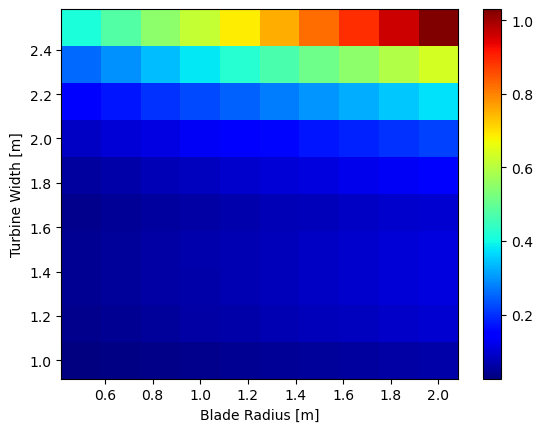

In [ ]:
# plot the power vs dimension
plt.pcolormesh(X, Y, np.reshape(power_list, (len(widths), len(radii))), cmap='jet')
plt.colorbar()
plt.xlabel('Blade Radius [m]')
plt.ylabel('Turbine Width [m]')
plt.show()

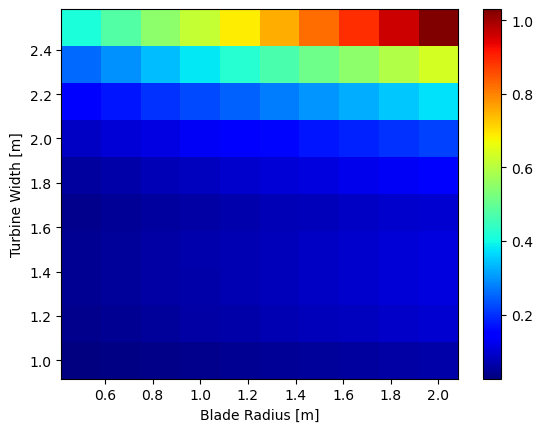

In [11]:
# blade radius and turbine width vs power

# initialise the river object
river.__init__(0.77, 0.33, 1.5, head=0)

# create a list of blade radii
radii = np.linspace(0.5, 2, 10)

# create a list of turbine widths
widths = np.linspace(1, 2.5, 10)

# create a list of power outputs
power_list = []

# iterate through the data and calculate the power output
for radius in radii:

    for width in widths:
        # re initialise the breastshot turbine object
        undershot_turbine.__init__(river, RPM=15, radius=radius, width=width, y_centre=0.2)

        # optimise the turbine position
        power = undershot_turbine.analysis()/1000

        # add the power and error to the lists
        power_list.append(power)

# create the meshgrid
X, Y = np.meshgrid(radii, widths)

# plot the power vs dimension
plt.pcolormesh(X, Y, np.reshape(power_list, (len(widths), len(radii))), cmap='jet')
plt.colorbar()
plt.xlabel('Blade Radius [m]')
plt.ylabel('Turbine Width [m]')
plt.show()

In [15]:
# number of blades sensitivity analysis

# assess the sensitivity of the power output to the number of blades for both breastshot and undershot turbines

# initialise the river object
river.__init__(0.77, 0.33, 2, head=1)

# create a list of integer number of blades
num_blades = np.linspace(3, 20, 18)

# create a list of power outputs
u_power_list = []
b_power_list = []

# initialise the turbine objects
breast_turbine.__init__(river,  x_centre=1.5, y_centre=0)
undershot_turbine.__init__(river,  y_centre=0.1)

# iterate through the data and calculate the power output
for num in num_blades:

    # re initialise the breastshot turbine object
    breast_turbine.__init__(river,  num_blades=int(num))
    undershot_turbine.__init__(river,  num_blades=int(num))

    # optimise the turbine position
    b_power = breast_turbine.analysis()/6000
    u_power = undershot_turbine.analysis()/1000

    # add the power and error to the lists
    b_power_list.append(b_power)
    u_power_list.append(u_power)




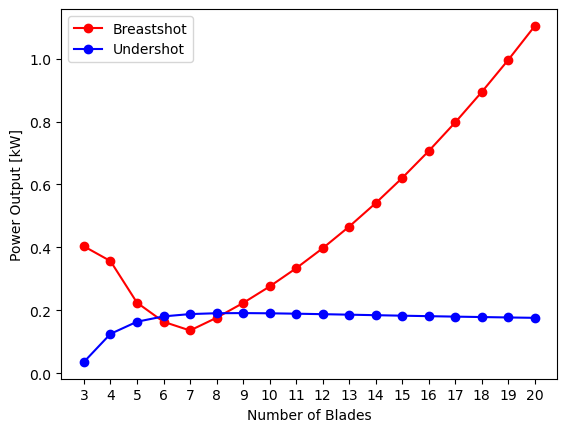

In [16]:
# plot the power vs number of blades for breastshot and undershot turbines
plt.plot(num_blades, b_power_list, 'o-',label='Breastshot', color='red')
plt.plot(num_blades, u_power_list, 'o-',label='Undershot', color='blue')
plt.xlabel('Number of Blades')
plt.ylabel('Power Output [kW]')

# make the x axis integers
plt.xticks(np.arange(min(num_blades), max(num_blades)+1, 1.0))
plt.legend()
plt.show()


This trend is not entirely accurate as the effect of blade blocking is not accounted for by the mathematical model. For greater accuracy a blade blocking component will need to be introduced to the model.

In [17]:
# rotational speed sensitivity analysis

# assess the sensitivity of the power output to the rotational speed against velocity for both breastshot and undershot turbines

# breastshot turbine

# create lists of rotational speeds, velocities and power outputs
rpms = np.linspace(2, 42, 20)
velocities = np.linspace(0.5, 10, 20)
flows = []
# create a list of power outputs
power_list = []

# iterate through the data and calculate the power output
for vel in velocities:
    # re initialise the river object
    river.__init__(0.77, 0.33, vel, head=1)

    breast_turbine.optimise()

    for rpm in rpms:

        # re initialise the breastshot turbine object
        breast_turbine.__init__(river, RPM=rpm)

        # optimise the turbine position
        power = breast_turbine.analysis()/1000

        # add the power to list
        power_list.append(power)

        
flows = velocities*river.width*river.depth

# create the meshgrid
X, Y = np.meshgrid(rpms, flows)



KeyboardInterrupt: 

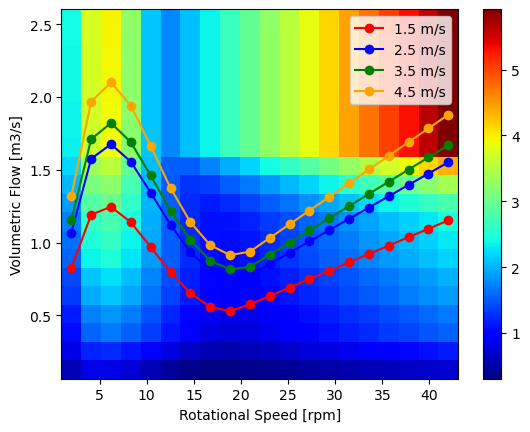

In [ ]:
# plot the power vs rotational speed
plt.pcolormesh(X, Y, np.reshape(power_list, (len(velocities), len(rpms))), cmap='jet')
plt.colorbar()
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Volumetric Flow [m3/s]')

# plot a curve of the power output vs rotational speed

plt.plot(rpms, power_list[20:40], 'o-',label='1.5 m/s', color='red')
plt.plot(rpms, power_list[40:60], 'o-',label='2.5 m/s', color='blue')
plt.plot(rpms, power_list[60:80], 'o-',label='3.5 m/s', color='green')
plt.plot(rpms, power_list[80:100], 'o-',label='4.5 m/s', color='orange')
plt.legend()
# give a key to the colours

plt.show()


In [ ]:
# rotational speed sensitivity analysis

# assess the sensitivity of the power output to the rotational speed against velocity for both breastshot and undershot turbines

# undershot turbine

# create lists of rotational speeds, velocities and power outputs
rpms = np.linspace(2, 42, 20)
velocities = np.linspace(0, 10, 20)
flows = []
# create a list of power outputs
power_list = []

# iterate through the data and calculate the power output
for vel in velocities:
    # re initialise the river object
    river.__init__(0.77, 0.33, vel, head=1)
        
    for rpm in rpms:

        # re initialise the breastshot turbine object
        undershot_turbine.__init__(river, RPM=rpm, y_centre=0.2)

        # optimise the turbine position
        power = undershot_turbine.analysis()/1000

        # add the power to list
        power_list.append(power)

        
flows = velocities*river.width*river.depth

# create the meshgrid
X, Y = np.meshgrid(rpms, flows)


/Users/philblecher/Desktop/Github/DP4-code/river_class.py:54: RuntimeWarning: invalid value encountered in double_scalars
  self.v_nappe = self.vol_flow_rate/(self.width * self.nappe_height)


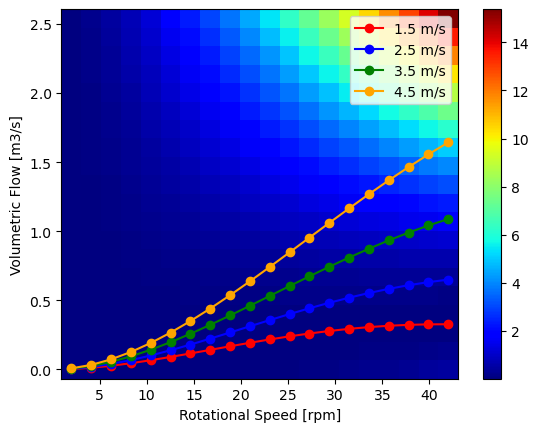

In [ ]:
# plot the power vs rotational speed on one axis and the power vs velocity on another axis
plt.pcolormesh(X, Y, np.reshape(power_list, (len(velocities), len(rpms))), cmap='jet')
plt.colorbar()

# plot a curve of the power output vs rotational speed
plt.plot(rpms, power_list[100:120], 'o-',label='1.5 m/s', color='red')
plt.plot(rpms, power_list[120:140], 'o-',label='2.5 m/s', color='blue')
plt.plot(rpms, power_list[140:160], 'o-',label='3.5 m/s', color='green')
plt.plot(rpms, power_list[160:180], 'o-',label='4.5 m/s', color='orange')


plt.legend()
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Volumetric Flow [m3/s]')
plt.show()

In [18]:
# under shot sensitivity to drag coefficient of blade

# create a list of drag coefficients
drag_coeff = np.linspace(0.1, 2.5, 20)

# create a list of power outputs
power_list = []

# iterate through the data and calculate the power output
for coeff in drag_coeff:
    
        # re initialise the breastshot turbine object
        undershot_turbine.__init__(river, drag_coeff=coeff)
    
        # optimise the turbine position
        power = undershot_turbine.analysis()/1000
    
        # add the power to list
        power_list.append(power)

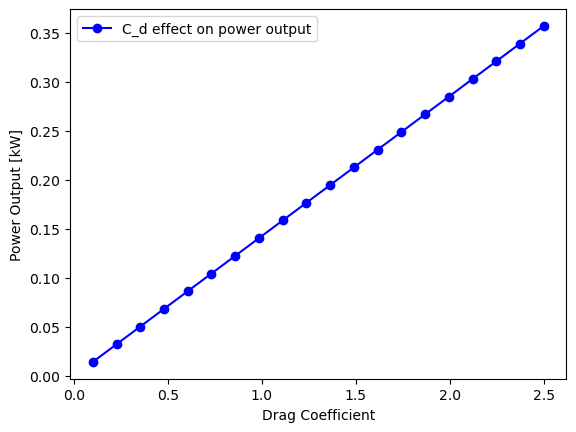

In [20]:
# plot the power vs drag coefficient
plt.plot(drag_coeff, power_list, 'o-',label= 'C_d effect on power output', color='blue')
plt.xlabel('Drag Coefficient')
plt.ylabel('Power Output [kW]')
plt.legend()
plt.show()
